In [1]:
# Ref https://www.dezyre.com/data-science-in-python-tutorial/scipy-introduction-tutorial

In [2]:
# checking dependencies and versions
! pip freeze | grep -E 'numpy|scipy'

numpy==1.15.1
scipy==1.1.0


In [3]:
from scipy import linalg
import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
matrix1 = np.array([[2,1],[4,3]])

In [5]:
matrix1

array([[2, 1],
       [4, 3]])

In [6]:
linalg.det(matrix1) # matrix1 is a Square matrix

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


2.0

In [8]:
linalg.inv(matrix1) # the inverse of a square matrix

array([[ 1.5, -0.5],
       [-2. ,  1. ]])

In [9]:
linalg.svd(matrix1) # the famous SVD 

(array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]),
 array([5.4649857 , 0.36596619]),
 array([[-0.81741556, -0.57604844],
        [-0.57604844,  0.81741556]]))

In [10]:
# optimize functions

In [11]:
from scipy import optimize

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [12]:
# define us one function
def f(x):
    return x**3 + x**2 + np.sin(x) + np.cos(x)

In [14]:
f(1)

3.3817732906760365

In [15]:
# defining an interval of values
t = np.arange(-50, 50, 0.01)

In [16]:
len(t)

10000

In [17]:
# for plotting
from matplotlib import pyplot as plt

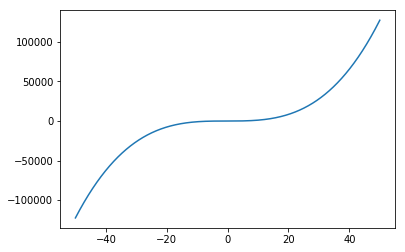

In [18]:
plt.plot(t, f(t))

In [19]:
# we want to calculate the minimum of this function, so we will try with BFGS algorithm
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -45849632878077184902692864.000000
         Iterations: 1
         Function evaluations: 48
         Gradient evaluations: 16


array([-3.57913946e+08])

In [20]:
t_min = optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -45849632878077184902692864.000000
         Iterations: 1
         Function evaluations: 48
         Gradient evaluations: 16


In [21]:
f(t_min)

array([-4.58496329e+25])

In [27]:
# using an interval where i want to find the minimum  
optimize.fminbound(f, -50, 50)

-49.99999215811929

In [30]:
# finding the roots, a estimation to be precise
roots = optimize.fsolve(f, 0)

In [31]:
roots

array([-0.85902437])

#### image processing

In [2]:
# be sure that Pillow package has been installed before
# some times is necessary re-start the jupyter kernel

In [3]:
# https://www.tutorialspoint.com/scipy/scipy_ndimage.htm

In [4]:
from scipy import misc

In [5]:
f = misc.face()
misc.imsave('face.png', f)

/home/ivan/Environments/ML/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [6]:
! ls | grep 'png'

face.png


In [7]:
import matplotlib.pyplot as plt

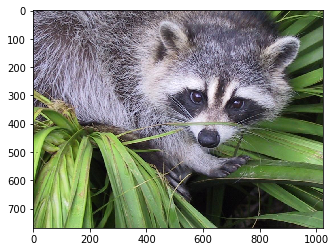

In [8]:
plt.imshow(f)

In [9]:
face1 = misc.face(gray=False)

In [10]:
print(face1.mean(), face1.max(), face1.min())

110.16274388631184 255 0


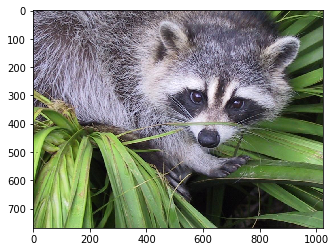

In [11]:
plt.imshow(face1)

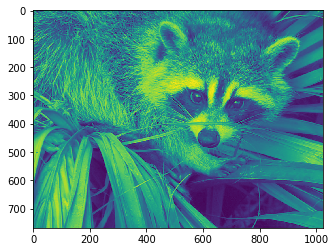

In [12]:
face2 = misc.face(gray=True)
plt.imshow(face2)

In [15]:
# cropping
lx, ly = face2.shape

In [16]:
lx, ly

(768, 1024)

In [23]:
crop_face2 = face2[int(lx/4): -int(lx/4), int(ly/4): -int(ly/4)]

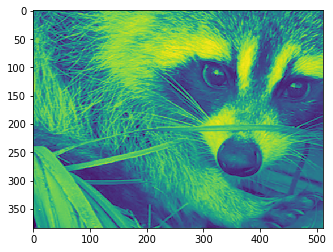

In [24]:
plt.imshow(crop_face2)

In [26]:
# rotation of the image

In [27]:
from scipy import misc, ndimage
face3 = misc.face()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [28]:
rotate_face = ndimage.rotate(face3, 45)

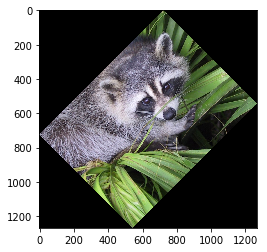

In [29]:
plt.imshow(rotate_face)

In [30]:
# filtering

In [31]:
face4 = misc.face()
blurred_face4 = ndimage.gaussian_filter(face4, sigma=3)

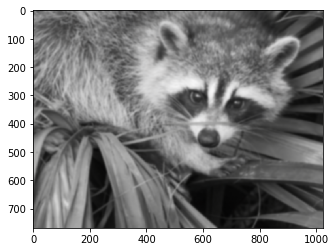

In [32]:
plt.imshow(blurred_face4)